Дадена е функцията $ f(x) = \frac{1}{2 + x} $. Построен е интерполационен полином на Лагранж $\ L_3(f; x) $.

Намерете оценка на грещката $\ R(x) = |f(x) - L_3(f;x)| $ в интервала $ [-1, 1] $, като използвате Теорема за оценка на грешката и построете графиката и.

Възлите на интерполация са:
* $ x_0 = -1;\space x_1 = -0,3;\space x_2 = 0.3;\space x_3 = 1 $
* Чебишовите възли в интервала $ [-1, 1] $

В кой случай оценката на грешката е по-добра? Защо?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
import sys
sys.path.append('../util')

from tschebyscheff import get_tschebyscheff_nodes
from lagrange_poly import lagrange_poly

In [3]:
def f(x):
    return 1 / (2 + x)

In [4]:
nodes = np.array([-1, -0.3, 0.3, 1])

In [34]:
tschebyscheff_nodes = get_tschebyscheff_nodes(nodes.size)

simplified_tschebyscheff_nodes = []
for el in tschebyscheff_nodes:
    simplified_tschebyscheff_nodes.append(round(el, 2))

simplified_tschebyscheff_nodes

[0.92, 0.38, -0.38, -0.92]

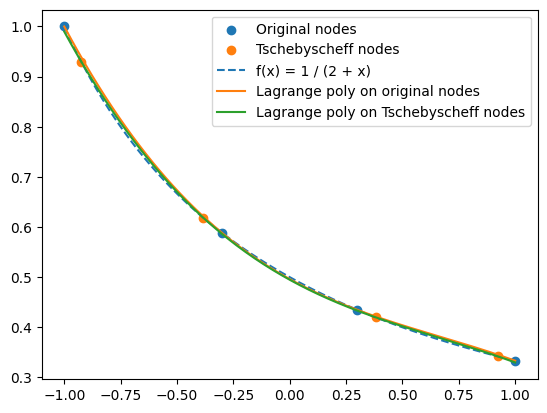

In [35]:
x_axis = np.linspace(nodes.min(), nodes.max(), 200)

plt.scatter(nodes, f(nodes))
plt.scatter(tschebyscheff_nodes, f(tschebyscheff_nodes))
plt.plot(x_axis, f(x_axis), linestyle='dashed')
plt.plot(x_axis, lagrange_poly(nodes, f, x_axis))
plt.plot(x_axis, lagrange_poly(tschebyscheff_nodes, f, x_axis))
plt.legend(['Original nodes', 'Tschebyscheff nodes', 'f(x) = 1 / (2 + x)',
 'Lagrange poly on original nodes', 'Lagrange poly on Tschebyscheff nodes'])
plt.show()

## Error evaluation

$ R_3(x) = |f(x) - L_3(f; x)| $

$ R_3(x) = |\frac{f^{(3 + 1)}(\zeta)}{(3 + 1)!} \displaystyle\prod_{i = 0}^{3}(x - x_i)| $, for some $ \zeta\isin[-1, 1]  $ 

We cannot deduce the value of $ \zeta $, so we will take the maximum possible error.

$ R_{3}(x) \leq M_{3}(x) :=  \frac{\displaystyle\max_{x \in [-1, 1]}|f^{(3 + 1)}(x)|}{(3 + 1)!} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{3}(x) =  \frac{\displaystyle\max_{x \isin [-1, 1]}|f^{(4)}(x)|}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

Let's calculate $ f^{(4)}(x) $

$ f(x) = \frac{1}{x+2} $

$ f^{(1)}(x) = \frac{-1}{(x+2)^2} $

$ f^{(2)}(x) = \frac{2}{(x+2)^3} $

$ f^{(3)}(x) = \frac{-6}{(x+2)^4} $

$ f^{(4)}(x) = \frac{24}{(x+2)^5} $

Now let's solve $ \displaystyle\max_{x \in [-1, 1]}|f^{(4)}(x)| $

$ \displaystyle\max_{x \in [-1, 1]}|\frac{24}{(x+2)^5}| = $
$ \displaystyle\max_{x \in [-1, 1]}[\frac{24}{(x+2)^5}] = $
$ \frac{24}{\displaystyle\min_{x \in [-1, 1]}[(x+2)^5]} = $
$ \frac{24}{[\displaystyle\min_{x \in [-1, 1]}(x+2)]^5} = $
$ \frac{24}{(-1+2)^5} = $
$ \frac{24}{1^5} = $
$ 24 $

$ M_{3}(x) =  \frac{\displaystyle\max_{x \isin [-1, 1]}|f^{(4)}(x)|}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{3}(x) =  \frac{24}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{3}(x) =  |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

In [36]:
def get_max_error_evaluation(nodes, x):
    return abs(math.prod((x - nodes[i] for i in range(nodes.size))))

[]

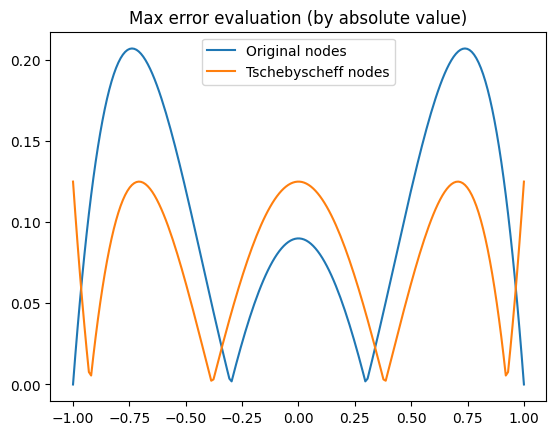

In [37]:
plt.plot(x_axis, get_max_error_evaluation(nodes, x_axis))
plt.plot(x_axis, get_max_error_evaluation(tschebyscheff_nodes, x_axis))
plt.legend(['Original nodes', 'Tschebyscheff nodes'])
plt.title('Max error evaluation (by absolute value)')
plt.plot()

In [29]:
def get_absolute_error(function, interpolating_function, nodes, values, x):
    return abs(function(x) - interpolating_function(nodes, values, x))

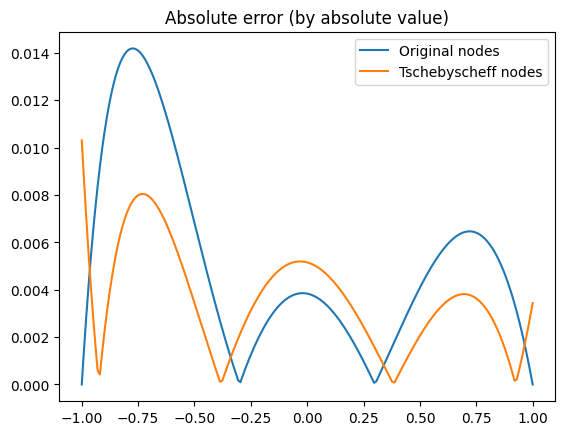

In [38]:
plt.plot(x_axis, get_absolute_error(f, lagrange_poly, nodes, f, x_axis))
plt.plot(x_axis, get_absolute_error(f, lagrange_poly, tschebyscheff_nodes, f, x_axis))
plt.legend(['Original nodes', 'Tschebyscheff nodes'])
plt.title('Absolute error (by absolute value)')
plt.show()

As expected the actual absolute error is a lot less than the maximum error evaluation.

We can notice that the Tschebyscheff nodes had overall smaller absolute error and had better error evaluation.

This is to be expected as the Tschebyscheff nodes are the best nodes for interpolation.